In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def myrange(x, steps=10, around_=-1):
  return np.around(np.arange(x.min(), x.max(), (x.max() - x.min())/steps, dtype=np.float64), around_)

In [212]:
a = pd.read_csv('80.csv', delimiter=',', names=['t', 'V'], dtype={'t': float, 'V':float})

In [213]:
ot_x = a['V'].to_numpy()[150:]
x    = a['t'].to_numpy()[150:]

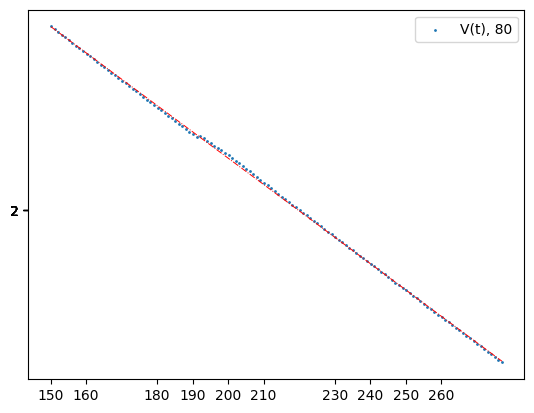

80.csv:   
-0.002456 x + 2.54 
 0.5370921822940655


In [214]:
ox = x
oy = np.log(ot_x)

plt.scatter(
    ox,  # ординаты точек
    oy,  # абсциссы точек
    # linestyle='',
    # xerr = 0,
    # yerr = 0,
    # marker=".",
    s=1,
    label="V(t), " + "80",
    #labrl="T(delta)"
    # elinewidth=2
)

z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1)
plt.plot(ox, p1(ox), linewidth=0.7, color='red', linestyle='-.')


plt.legend(loc='best')
plt.xticks(myrange(ox))
plt.yticks(myrange(oy, around_=0))
plt.show()
print( '80.csv:  ' + str(p1),'\n', (res[0][0] ** 0.5)/((z1[0])**2))

40.csv:   
-0.004952 x + 2.575 
 1.425883938224707e-06
80.csv:   
-0.002451 x + 2.537 
 4.04257935881643e-06
120.csv:   
-0.001752 x + 2.714 
 1.7879521676081583e-06
160.csv:   
-0.001396 x + 2.629 
 2.012289204294367e-06
200.csv:   
-0.001095 x + 2.587 
 2.233857125206756e-06
240.csv:   
-0.0008877 x + 2.546 
 8.038541487175099e-07


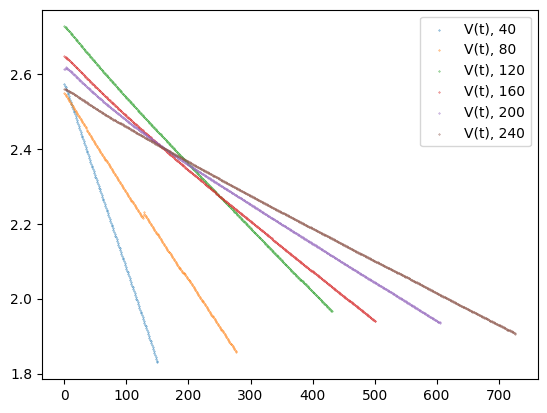

In [223]:
strings = []
sigma_koefs_=[]
for i in range(1, 7):
    a = pd.read_csv(str(40 * i) + '.csv', delimiter=',', names=['t', 'V'], dtype={'t': float, 'V':float})
    ot_x = a['V'].to_numpy()
    x    = a['t'].to_numpy()
    ox = x
    oy = np.log(ot_x)

    plt.scatter(
        ox,  # ординаты точек
        oy,  # абсциссы точек
        # linestyle='',
        # xerr = 0,
        # yerr = 0,
        # marker=".",
        s=0.1,
        label="V(t), " + str(40 * i),
        #labrl="T(delta)"
        # elinewidth=2
    )

    z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
    p1 = np.poly1d(z1)
    # plt.plot(ox, p1(ox), linewidth=0.7, color='red', linestyle='-.')

    plt.legend(loc='best')
    # plt.xticks(np.around(myrange(ox, around_=0), 1))
    # plt.yticks(myrange(oy, around_=1))
    print(str(40 * i) + '.csv:  ' + str(p1),'\n', (res[0][0] ** 0.5))
    sigma_koefs_.append((res[0][0] ** 0.5))
    strings.append(str(40 * i) + '.csv:  ' + str(p1))
# for i in strings:
plt.show()
#     print(i)

In [164]:
koefs       = np.array((-0.004952, -0.002456, -0.001752, -0.001396, -0.001095, -0.0008877))
sigma_koefs = np.array(sigma_koefs_)
sigma_koefs
# sigma_koefs = np.array(( 0.058135,  0.53709,  0.5826796, 1.0328702, 1.8616958, 1.0200163))

array([1.42588394e-06, 4.04257936e-06, 1.78795217e-06, 2.01228920e-06,
       2.23385713e-06, 8.03854149e-07])

In [ ]:
v1 = 800 * 10 ** (-6)
v2 = v1
a = 15 * 100
d = -koefs * a * v1 * v2 / (v1 + v2)
for i in d:
  print(np.around(i * 10 **4, 1))

In [170]:
ls=0.1/15
v=5/800
sigma_d = d * np.sqrt(
  (sigma_koefs/koefs)**2 + ls**2 + v**2 + v**2 + v**2
)
for i in sigma_d:
  print(np.around(i * 10**4, 2))
print(d)

0.38
0.19
0.13
0.11
0.08
0.07
[0.0029712  0.0014736  0.0010512  0.0008376  0.000657   0.00053262]


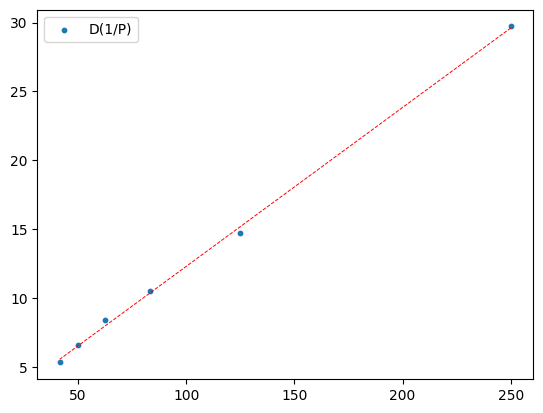

D(1/P): 
0.1154 x + 0.7622 
 \sigma 19.21736694442246
 
0.1154 x + 0.7622
7623.1957856563295
7623.1957856563295


In [224]:
ox = 1 / np.array((40, 80, 120, 160, 200, 240))
oy = d
ox = ox * 10 **4
oy = oy * 10 **4
plt.scatter(
    ox,  # ординаты точек
    oy,  # абсциссы точек
    # linestyle='',
    # xerr = 0,
    # yerr = 0,
    # marker=".",
    s=10,
    label="D(1/P)",
    #labrl="T(delta)"
    # elinewidth=2
)

z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1)
plt.plot(ox, p1(ox), linewidth=0.7, color='red', linestyle='--')


plt.legend(loc='best')
# plt.xticks(myrange(ox))
# plt.yticks(myrange(oy, around_=0))
plt.show()
print('D(1/P):' + str(p1),'\n', "\sigma",(res[0][0] ** 0.5) * 10**4)
print(p1)
print((p1[1] /732 + p1[0]) * 10**4)
d_atm=p1(1/732) * 10**4
print(d_atm)

In [207]:
(7.5/732) **2

0.00010497850040311743

In [9]:
print(2 / 5.32 / 64.5)

24.24812030075188
